# Manifold Alignment via Stochastic Hoppoing (MASH) Demonstration

This demonstrates how to use the MASH class. Note, not everything discussed in the paper will be shown here. 

In [1]:
from mashspud import MASH

#We will require pandas for this demonstration
import pandas as pd
import numpy as np
from demonstration_helper import *

#Include a random state
rs = {"random_state" : 42} #NOTE: a random state of 42 would be initialized anyways.

## Iris Dataset

In [2]:
#Prepare the dataset
iris_features, iris_labels = prepare_dataset("csv_files/iris.csv")

#Create domains
iris_domainA, iris_domainB = split_features(iris_features, split = "distort") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
iris_anchors = create_anchors(int(len(iris_features)))[-10:] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
iris_mashed = MASH(knn = 5, t =-1, verbose = 0, IDC = 1, DTM = 'log', page_rank = "None", density_normalization = False, distance_measure_A = "euclidean",
                    distance_measure_B = "euclidean", **rs) #NOTE: these are the default values. Try changing them!

#Fit SPUD
iris_mashed.fit(dataA = iris_domainA, dataB = iris_domainB, known_anchors=iris_anchors)

/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 9 and 34, 9 and 37, 34 and 37, 101 and 142. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


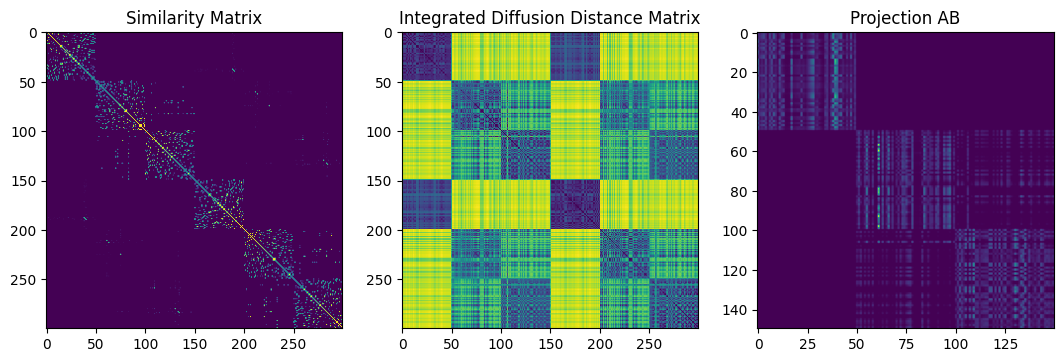

In [3]:
iris_mashed.plot_heat_maps()

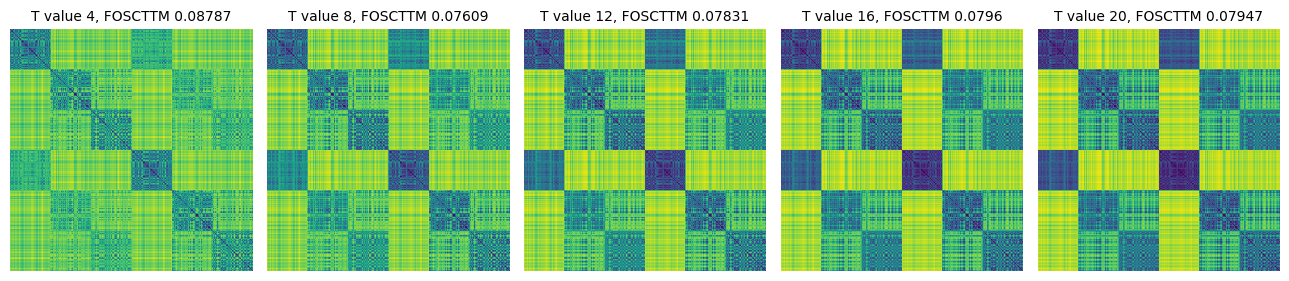

In [4]:
iris_mashed.plot_t_grid(rate = 4) #This function helps you find an ideal t value to use. 

Cross Embedding score: 0.9266666666666666
Fraction of Samples Closest to thier Match: 0.07946666666666667


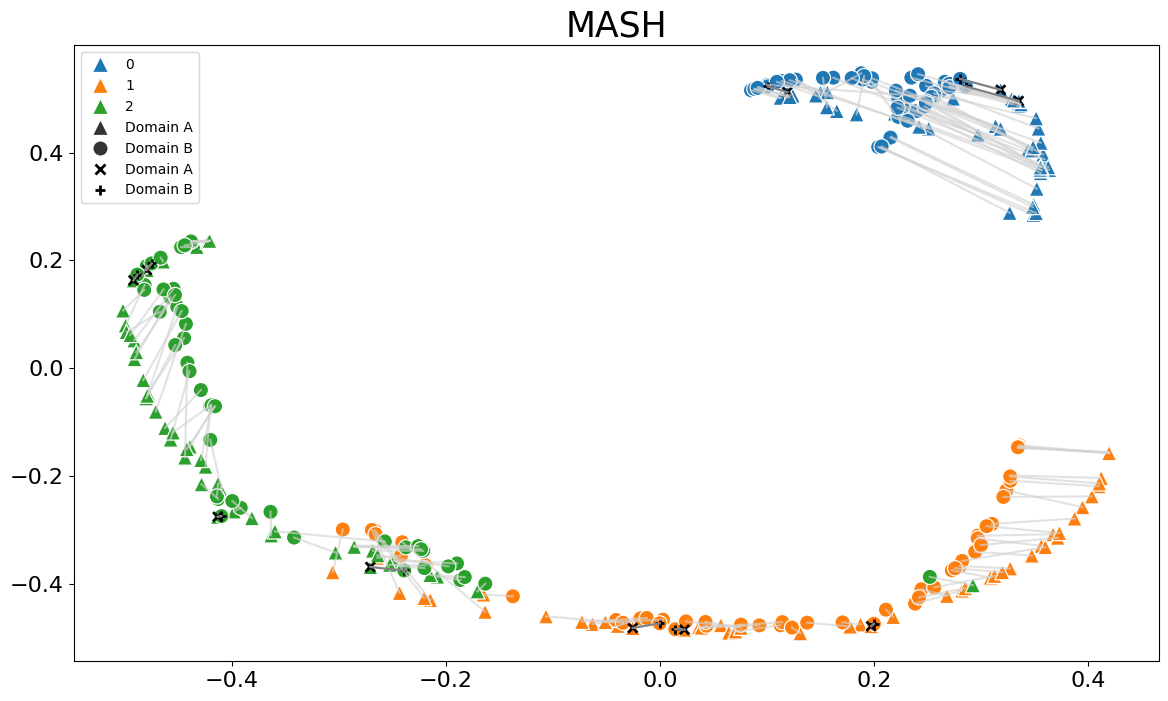

In [5]:
iris_mashed.plot_emb(labels = iris_labels)

How to interpret the above graph:
- The triangles are instances that come from Domain A, whereas the circles are instances that come from Domain B. 
- The light gray lines connect instances between domains that are the same (though distorted some how). The samller the line, the better i.e. leads to a lower (and better) FOSCTTM score.
- The black x or + means that the instance is an anchor, and thus was known knowledge for the algorithm to use. 
- The colors are different classes. We hope for their to be a natural class split. The better thr split, the higher the CE score. 

## Seeds Dataset


In [4]:
#Prepare the dataset
seeds_features, seeds_labels = prepare_dataset("csv_files/seeds.csv")

#Create domains
seeds_domainA, seeds_domainB = split_features(seeds_features, split = "rotation") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
seeds_anchors = create_anchors(int(len(seeds_features)))[:20] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
seeds_mashed = MASH(knn = 9, t=-1, verbose = 2, IDC = 1, DTM = 'hellinger', page_rank = "off_diagonal", density_normalization = True, distance_measure_A = "cityblock",
                    distance_measure_B = "cityblock", **rs)

#Fit SPUD
seeds_mashed.fit(dataA = seeds_domainA, dataB = seeds_domainB, known_anchors=seeds_anchors[:10])

Using optimal t value of 27
Fit process finished. We recommend calling optimize_by_creating_connections.


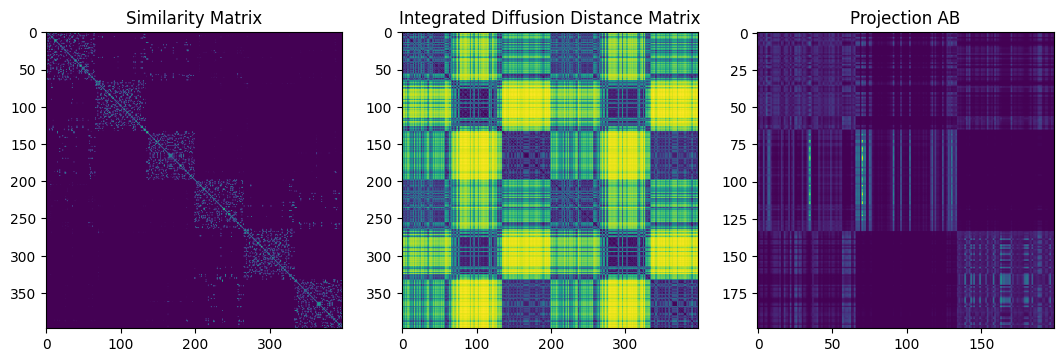

In [7]:
seeds_mashed.plot_heat_maps()

Cross Embedding score: 0.8919597989949748
Fraction of Samples Closest to thier Match: 0.052776445039266685


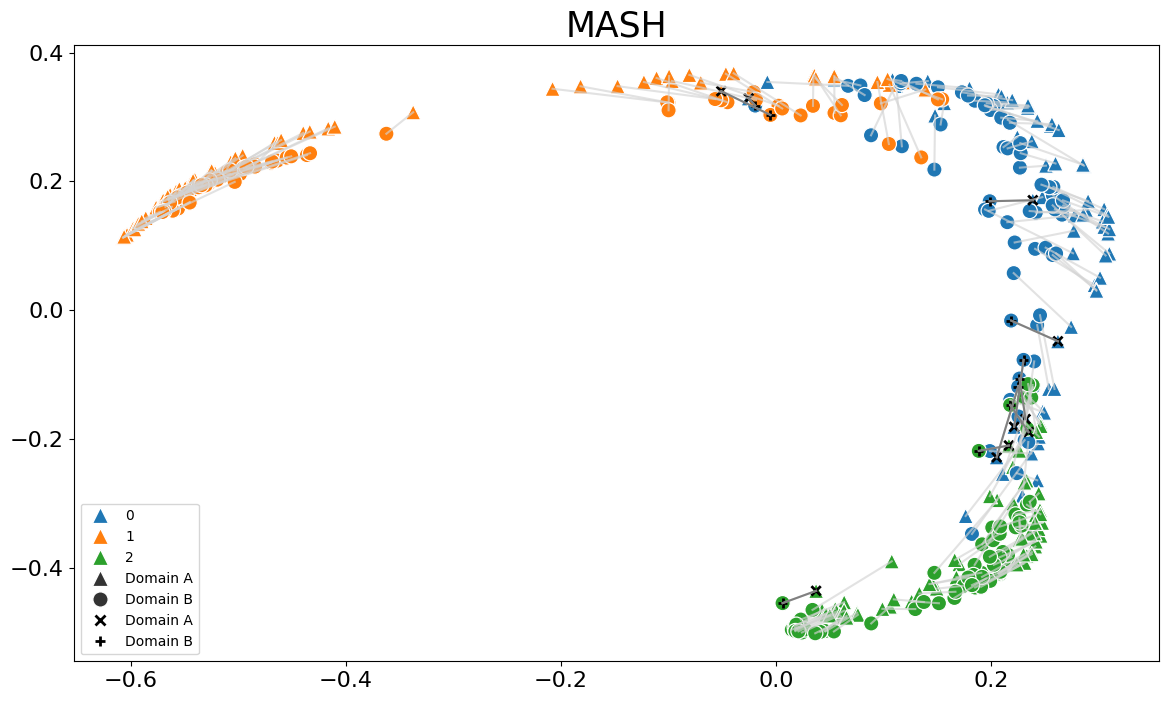

In [8]:
seeds_mashed.plot_emb(labels = seeds_labels) # We can see here in the center the domains seem to split apart in the blue area, because there are no anchors represented there.

In [9]:
seeds_mashed.optimize_by_creating_connections(epochs= 3, threshold = "auto", connection_limit="auto", hold_out_anchors=seeds_anchors[-10:])

Edges wont be set with similarity measure above: 0.4504564480292255
<><><><><><><><><><><><>    Starting Epoch 0    <><><><><><><><><><><><><>
Total number of Known_connections: 5318
New connections found: 1568
Using optimal t value of 6
The new connections improved the alignment by 0.0464824120603015
-----------     Keeping the new alignment. Continuing...    -----------

<><><><><><><><><><><><>    Starting Epoch 1    <><><><><><><><><><><><><>
Total number of Known_connections: 8453
New connections found: 233
Using optimal t value of 6
The new connections worsened the alignment by 0.0
-----------     Pruning the new connections. Continuing...    -----------

<><><><><><><><><><><><>    Starting Epoch 2    <><><><><><><><><><><><><>
Total number of Known_connections: 8453
No new_connections. Exiting process
Using optimal t value of 6


True

In [11]:
FOSCTTM_score, CE_score = seeds_mashed.get_scores(labels = seeds_labels) #NOTE: Notice the reduce in FOSCTTM scores
print(f"Cross Embedding score: {CE_score}")
print(f"Fraction of Samples Closest to thier Match: {FOSCTTM_score}")

Cross Embedding score: 0.8919597989949748
Fraction of Samples Closest to thier Match: 0.013156233428448775


## Breast Cancer Dataset

In [16]:
#Prepare the dataset
cancer_features, cancer_labels = prepare_dataset("csv_files/breast_cancer.csv")

#Create domains
cancer_domainA, cancer_domainB = split_features(cancer_features, split = "rotation") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
cancer_anchors = create_anchors(int(len(cancer_features)))[:20] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
cancer_mashed = MASH(knn = 12, t=-1, verbose = 3, IDC = 1, DTM = 'log', page_rank = "off_diagonal", density_normalization = True, distance_measure_A = "euclidean",
                    distance_measure_B = "euclidean", **rs)

#Fit SPUD
cancer_mashed.fit(dataA = cancer_domainA, dataB = cancer_domainB, known_anchors=cancer_anchors[:10])

Time Data Below
 Time it took to execute SGDM for domain A:  0.00608
 Time it took to execute the graph for domain A:  0.12704
 Time it took to execute SGDM for domain B:  0.00449


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (699, 699) is expensive. Consider setting n_pca.
  warnings.warn(
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 1140 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (699, 699) is expensive. Consider setting n_pca.
  warnings.warn(
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/gra

 Time it took to execute the graph for domain B:  0.11574
 Time it took to compute merge_graphs function:  0.21964
 Time it took to compute similarity_matrix function:  0.01412
Using optimal t value of 15
 Time it took to compute diffusion process:  1.36675
Fit process finished. We recommend calling optimize_by_creating_connections.


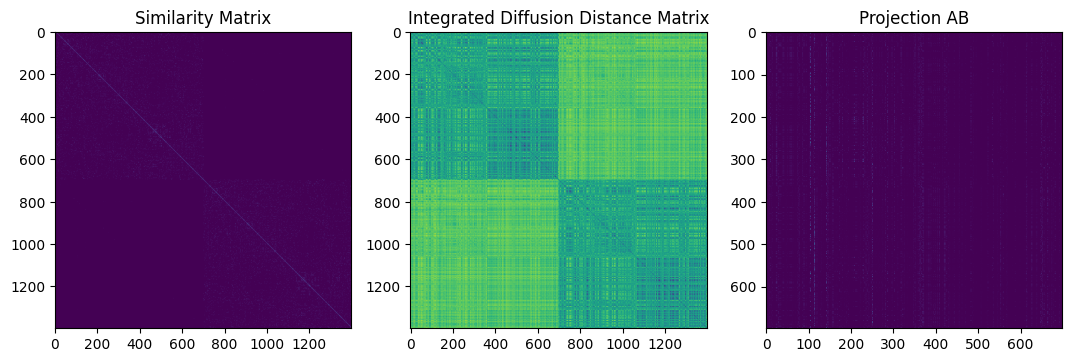

In [14]:
cancer_mashed.plot_heat_maps()

Time it took to calculate the embedding: 18.4642
Cross Embedding score: 0.9678111587982833
Fraction of Samples Closest to thier Match: 0.17795911183153532


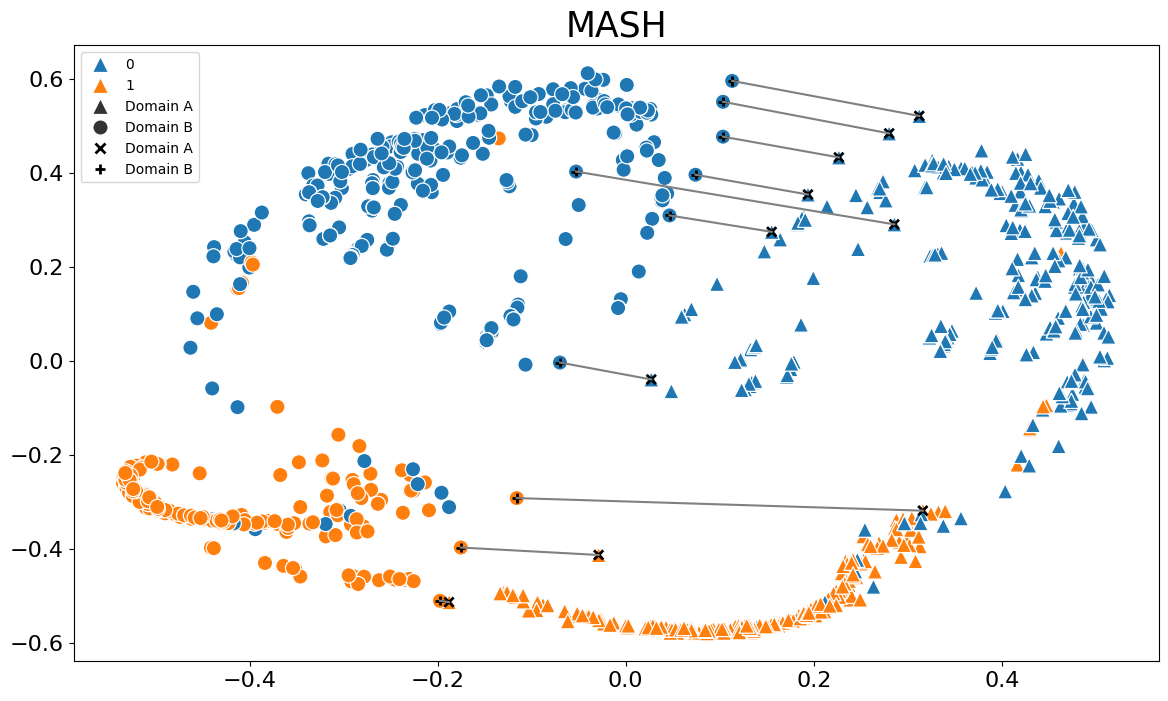

In [17]:
cancer_mashed.plot_emb(labels = cancer_labels, show_lines = False, show_pred = False)

## Glass Dataset

In [61]:
#Prepare the dataset
glass_features, glass_labels = prepare_dataset("csv_files/glass.csv")

#Create domains
glass_domainA, glass_domainB = split_features(glass_features, split = "rotation")

#Create anchors. Use only 10 anchors. 
glass_anchors = create_anchors(int(len(glass_features)))[:35] 

# Initialize SPUD
glass_mashed = MASH(knn = 3, t=22, verbose = 3, IDC = 1, DTM = 'log', page_rank = "None", density_normalization = False, distance_measure_A = "euclidean",
                    distance_measure_B = "euclidean", **rs) #NOTE: Try changing the DTM to be hellinger!

#Fit SPUD
glass_mashed.fit(dataA = glass_domainA, dataB = glass_domainB, known_anchors=glass_anchors[5:15])

Time Data Below
 Time it took to execute SGDM for domain A:  0.00055
 Time it took to execute the graph for domain A:  0.08028
 Time it took to execute SGDM for domain B:  0.00059
 Time it took to execute the graph for domain B:  0.0729
 Time it took to compute merge_graphs function:  0.02523
 Time it took to compute similarity_matrix function:  0.00056
 Time it took to compute diffusion process:  0.03312
Fit process finished. We recommend calling optimize_by_creating_connections.


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 38 and 39. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 38 and 39. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/Graph-Manifold-Alignment/SPUD_and_MASH/SPUD_and_MASH/MASH.py:314: RuntimeWarning: invalid value encountered in divide
  return matrix / row_sums[:, np.newaxis]


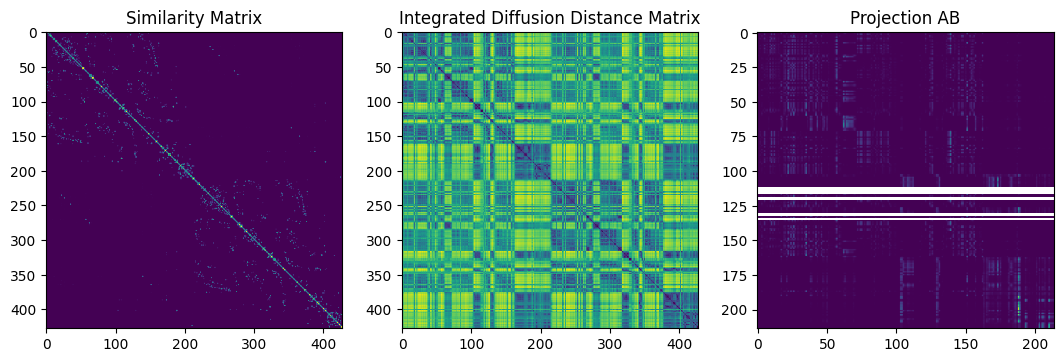

In [62]:
glass_mashed.plot_heat_maps()

Time it took to calculate the embedding: 1.24308
Cross Embedding score: 0.7313084112149533
Fraction of Samples Closest to thier Match: 0.0666215389990392


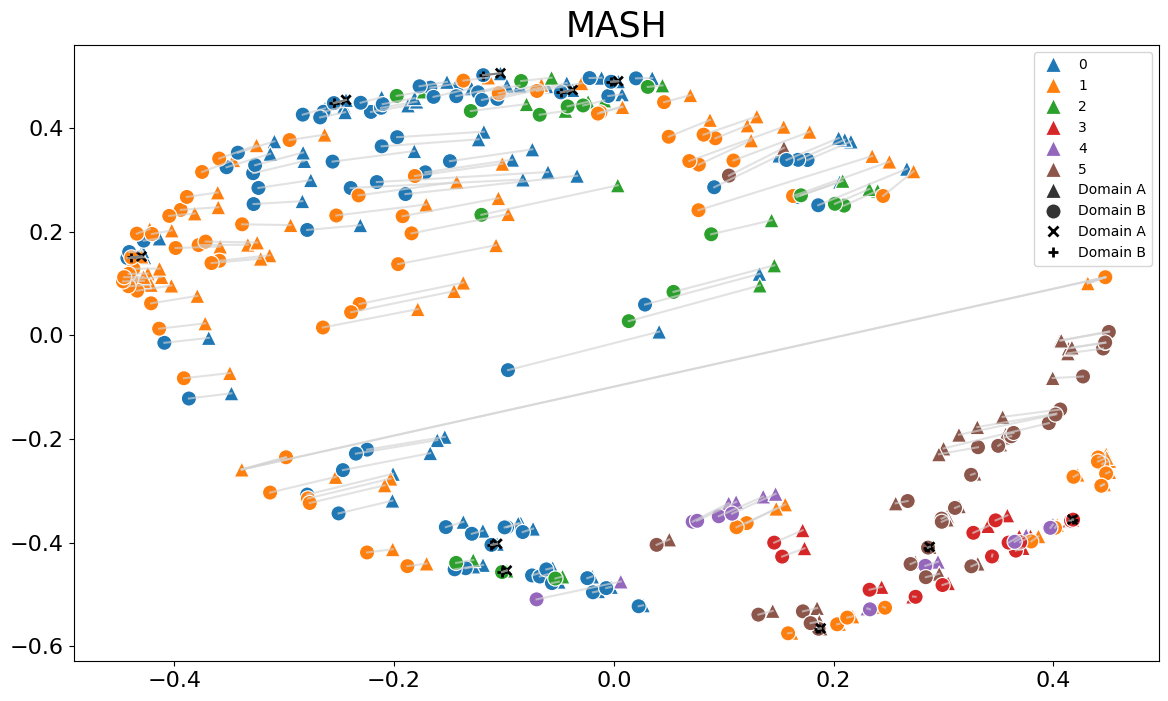

In [63]:
glass_mashed.plot_emb(labels = glass_labels)

In [ ]:
#That's it for the demo! Try adding the following line:
#glass_mashed.optimize_by_creating_connections(epochs= 3, threshold = "auto", connection_limit=None, hold_out_anchors=glass_anchors[-10:])